# Homework # 6

## Overfitting and Deterministic Noise

### 1.
Deterministic noise depends on $\mathcal{H}$, as some models approximate $f$ better than
others. Assume $\mathcal{H}' \subset \mathcal{H}$ and that $f$ is fixed. **In general**
(but not necessarily in all cases), if we use $\mathcal{H}'$ instead of $\mathcal{H}$, how does deterministic noise behave?

[a] In general, deterministic noise will decrease.

[b] In general, deterministic noise will increase.

[c] In general, deterministic noise will be the same.

[d] There is deterministic noise for only one of $\mathcal{H}$ and $\mathcal{H}'$.

In general, deterministic noise will increase.

## Regularization with Weight Decay
In the following problems use the data provided in the files
* http://work.caltech.edu/data/in.dta
* http://work.caltech.edu/data/out.dta

as a training and test set respectively. Each line of the files corresponds to a two-
dimensional input $\mathbf{x} = (x_1 ,x_2 )$, so that $\mathcal{X} = \mathbb{R}^2$,
followed by the corresponding label from $\mathcal{Y} = \{−1,1\}$.
We are going to apply Linear Regression with a non-linear transformation for classification.
The nonlinear transformation is given by
$$\phi(x_1 ,x_2 ) = (1,x_1 ,x_2 ,x_1^2, x_2^2, x_1 x_2, |x_1 - x_2|, |x_1 + x_2|)$$
Recall that the classification error is defined as the fraction of misclassified points.

### 2.
Run Linear Regression on the training set after performing the non-linear trans-
formation. What values are closest (in Euclidean distance) to the in-sample and
out-of-sample classification errors, respectively?

[a] 0.03, 0.08

[b] 0.03, 0.10

[c] 0.04, 0.09

[d] 0.04, 0.11

[e] 0.05, 0.10

In [5]:
# download("http://work.caltech.edu/data/in.dta", "in.dta")
# download("http://work.caltech.edu/data/out.dta", "out.dta")

In [2]:
training_data = readdlm("in.dta")
test_data = readdlm("out.dta");

In [3]:
@show(size(training_data))
@show(size(test_data));

size(training_data) = (35,3)
size(test_data) = (250,3)


In [4]:
transformer = x -> [1, x[1], x[2], x[1]^2, x[2]^2, x[1]*x[2], abs(x[1]-x[2]), abs(x[1]+x[2])]

(anonymous function)

In [5]:
training_points = mapslices(transformer, training_data, 2)
training_labels = training_data[:,3];

In [6]:
function mis_classified_count(points, labels, weights)
    return sum(sign(points*weights) .!= labels)
end

function linear_regression(points, labels)
    return pinv(points'*points)*points'*labels # this is faster than simple pinv(points)*labels
end

linear_regression (generic function with 1 method)

In [7]:
training_weights = linear_regression(training_points, training_labels)

8-element Array{Float64,1}:
 -1.64707 
 -0.145059
  0.101541
 -2.03297 
 -1.82804 
  2.48153 
  4.15894 
  0.316517

In [8]:
in_sample_error=
mis_classified_count(training_points,training_labels,training_weights)/length(training_points[:,1])
@show(in_sample_error);

in_sample_error = 0.02857142857142857


In [9]:
@show(in_sample_error);

in_sample_error = 0.02857142857142857


In [10]:
test_points = mapslices(transformer, test_data, 2)
test_labels = test_data[:,3];

In [11]:
@show(size(test_points));

size(test_points) = (250,8)


In [12]:
out_sample_error=mis_classified_count(test_points,test_labels,training_weights)/length(test_points[:,1])
@show(out_sample_error);

out_sample_error = 0.084


In [13]:
using PyCall,PyPlot
@pyimport seaborn as sns

function plot_nonlinear_regression(points, labels, weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("regression",figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    t = s'
    u = weights[1] .+ weights[2].*t .+ weights[3].*s .+
    weights[4].*t.^2 .+ weights[5].*s.^2 .+ weights[6].*t.*s .+
    weights[7].*abs(t .- s) + weights[8].*abs(t .+ s)
    contour(t, s, u, 0, colors=("yellow"))
    title("Regression")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_nonlinear_regression (generic function with 1 method)

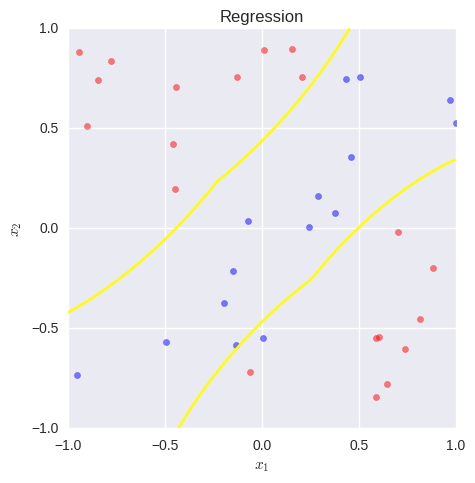

In [14]:
plot_nonlinear_regression(training_points, training_labels, training_weights)

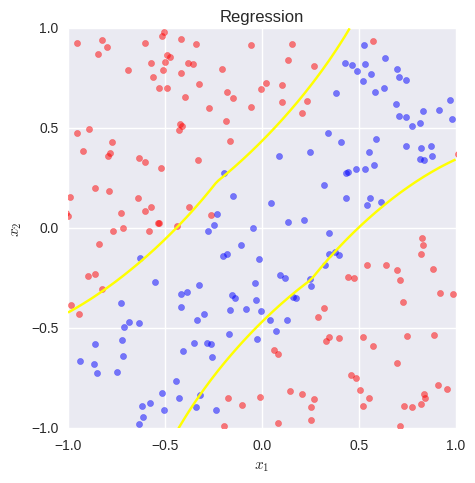

In [15]:
plot_nonlinear_regression(test_points, test_labels, training_weights)

### 3.
Now add weight decay to Linear Regression, that is, add the term
$\frac{\lambda}{N}\sum_{i=0}^7 w_i^2$ to the squared in-sample error,
using $\lambda = 10^k$. What are the closest values to
the in-sample and out-of-sample classification errors, respectively, for $k = −3$?
Recall that the solution for Linear Regression with Weight Decay was derived
in class.

[a] 0.01, 0.02

[b] 0.02, 0.04

[c] 0.02, 0.06

[d] 0.03, 0.08

[e] 0.03, 0.10

In [16]:
function linear_regression_with_decay(points, labels, lambda)
    return pinv(points'*points + lambda*eye(length(points[1,:]))) * points' * labels
end

linear_regression_with_decay (generic function with 1 method)

In [17]:
training_weights = linear_regression_with_decay(training_points, training_labels, 1e-3)

8-element Array{Float64,1}:
 -1.64328 
 -0.143335
  0.101443
 -2.02457 
 -1.81722 
  2.45551 
  4.14009 
  0.319601

In [18]:
in_sample_error=
mis_classified_count(training_points,training_labels,training_weights)/length(training_points[:,1])
@show(in_sample_error);

in_sample_error = 0.02857142857142857


In [19]:
out_sample_error=mis_classified_count(test_points,test_labels,training_weights)/length(test_points[:,1])
@show(out_sample_error);

out_sample_error = 0.08


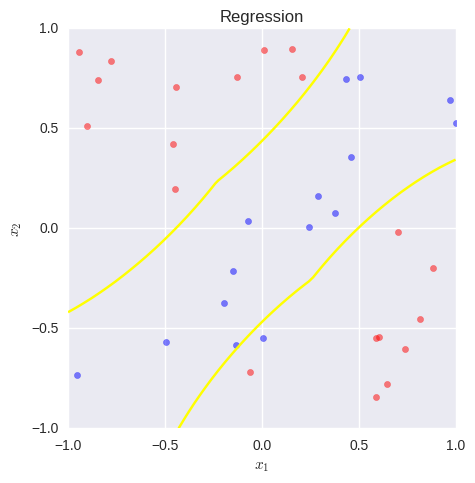

In [20]:
plot_nonlinear_regression(training_points, training_labels, training_weights)

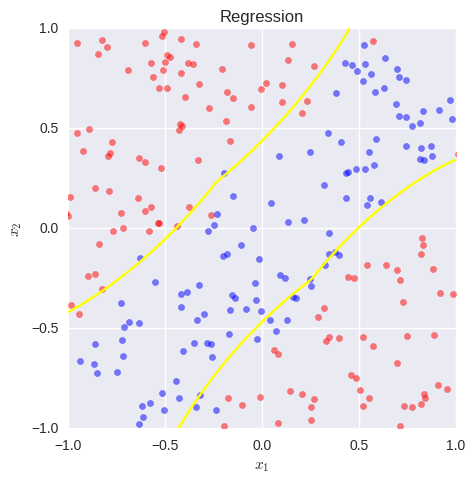

In [21]:
plot_nonlinear_regression(test_points, test_labels, training_weights)

### 4.
Now, use $k = 3$. What are the closest values to the new in-sample and out-of-
sample classification errors, respectively?

[a] 0.2, 0.2

[b] 0.2, 0.3

[c] 0.3, 0.3

[d] 0.3, 0.4

[e] 0.4, 0.4

In [22]:
training_weights = linear_regression_with_decay(training_points, training_labels, 1e3)

8-element Array{Float64,1}:
  0.00435688
 -0.00134416
  0.0024939 
  0.00328695
  0.00484127
 -0.00862023
  0.0178671 
 -0.00490192

In [23]:
in_sample_error=
mis_classified_count(training_points,training_labels,training_weights)/length(training_points[:,1])
@show(in_sample_error);

in_sample_error = 0.37142857142857144


In [24]:
out_sample_error=mis_classified_count(test_points,test_labels,training_weights)/length(test_points[:,1])
@show(out_sample_error);

out_sample_error = 0.436


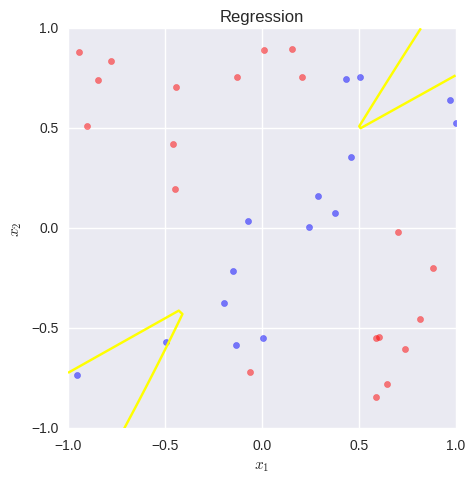

In [25]:
plot_nonlinear_regression(training_points, training_labels, training_weights)

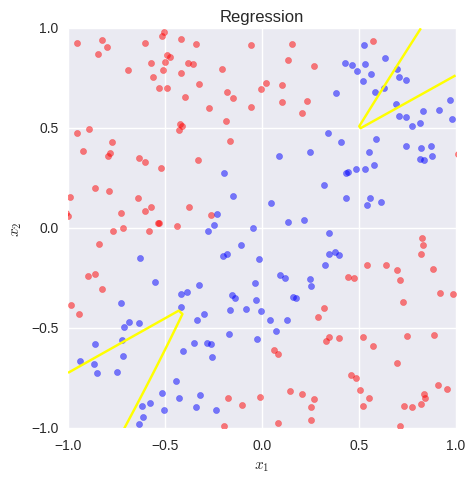

In [26]:
plot_nonlinear_regression(test_points, test_labels, training_weights)

### 5.
What value of $k$, among the following choices, achieves the smallest out-of-sample classification error?

[a] 2

[b] 1

[c] 0

[d] −1

[e] −2

In [27]:
for lambda in [1e2, 1e1, 1e0, 1e-1, 1e-2]
    training_weights = linear_regression_with_decay(training_points, training_labels, lambda)
    out_sample_error=mis_classified_count(test_points,test_labels,training_weights)/length(test_points[:,1])
    @show(lambda, out_sample_error)
end

lambda = 100.0
out_sample_error = 0.228
lambda = 10.0
out_sample_error = 0.124
lambda = 1.0
out_sample_error = 0.092
lambda = 0.1
out_sample_error = 0.056
lambda = 0.01
out_sample_error = 0.084


### 6.
What value is closest to the minimum out-of-sample classification error achieved
by varying $k$ (limiting $k$ to integer values)?

[a] 0.04

[b] 0.06

[c] 0.08

[d] 0.10

[e] 0.12

In [28]:
using PyPlot

function question6()
    out_sample_errors = []
    xin = -10:10
    for k in xin
        lambda = 10.0^k
        training_weights = linear_regression_with_decay(training_points, training_labels, lambda)
        out_sample_error=mis_classified_count(test_points,test_labels,training_weights)/length(test_points[:,1])
        push!(out_sample_errors, out_sample_error)
    end
    figure(figsize=(5,5))
    plot(xin,out_sample_errors)
    return minimum(out_sample_errors)
end

question6 (generic function with 1 method)

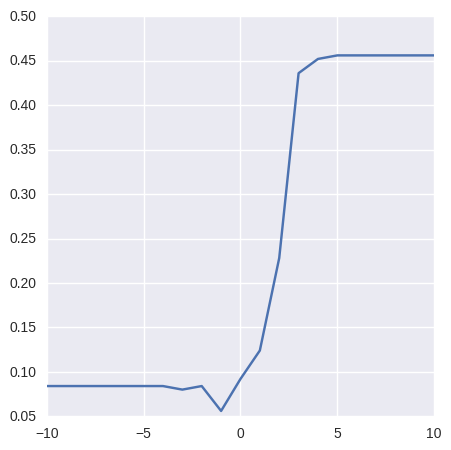

0.056

In [29]:
question6()

## Regularization for Polynomials

Polynomial models can be viewed as linear models in a space $\mathcal{Z}$, under a nonlinear
transform $\Phi: \mathcal{X}\to\mathcal{Z}$. Here, $\Phi$ transforms the scalar $x$ into a vector $\mathbf{z}$ of Legendre polynomials, $\mathbf{z} = (1,L_1(x),L_2(x),\ldots,L_Q(x))$. Our hypothesis set will be expressed as a linear combination of these polynomials,
$$\mathcal{H}_Q = \left\{ h \mid h(x) = \mathbf{w}^\intercal \mathbf{z} =
\sum_{q=0}^Q w_q L_q(x) \right\}$$
where $L_0(x)=1$.

### 7.
Consider the following hypothesis set defined by the constraint:
$$H(Q,C,Q_o) = \{ h \mid h(x) = \mathbf{w}^\intercal \mathbf{z} \in \mathcal{H}_Q ;w_q = C \mbox{ for }q \geq Q_o \}$$
which of the following statements is correct:

[a] $\mathcal{H}(10,0,3) \cup \mathcal{H}(10,0,4) = \mathcal{H}_4$

[b] $\mathcal{H}(10,0,3) \cup \mathcal{H}(10,0,4) = \mathcal{H}_3$

[c] $\mathcal{H}(10,0,3) \cap \mathcal{H}(10,0,4) = \mathcal{H}_2$

[d] $\mathcal{H}(10,0,3) \cap \mathcal{H}(10,0,4) = \mathcal{H}_1$

[e] None of the above

$\mathcal{H}(10,0,3) = \mathcal{H}(10,0,4) = \mathcal{H}_2$ by definition.

##  Neural Networks

### 8.
A fully connected Neural Network has $L = 2$; $d^{(0)} = 5, d^{(1)} = 3, d^{(2)} = 1$.
If only products of the form $w_{ij}^{(l)}x_i^{(l-1)}, w_{ij}^{(l)}\delta_j^{(l)}$, and $x_i^{(l-1)}\delta_j^{(l)}$ count as operations (even for $x_0^{(l−1)}=1$), without counting anything else,
which of the following is the closest to the total number of operations in a single iteration of backpropagation (using SGD on one data point)?

[a] 30

[b] 35

[c] 40

[d] 45

[e] 50

* In forward propagation, we need $6\cdot 3 + 4\cdot 1=22$ operations.
* In the final layer, we need $3$ operations.
* In backpropagation, we need $6\cdot 3 + 4\cdot 1=22$ operations.

So, we need $47$ operations.

Let us call every 'node' in a Neural Network a unit, whether that unit is an input
variable or a neuron in one of the layers. Consider a Neural Network that has $10$
input units (the constant $x_0^{(0)}$ is counted here as a unit), one output unit, and $36$
hidden units (each $x_0^{(l)}$ is also counted as a unit). The hidden units can be arranged
in any number of layers $l = 1,\cdots,L−1$, and each layer is fully connected to the layer
above it.

### 9.
What is the minimum possible number of weights that such a network can have?

[a] 46

[b] 47

[c] 56

[d] 57

[e] 58

We can create a network with less weights by adding layers.
In this time, we have $36$ hidden units and can create $36/2=18$ hidden layers.

The number of weights is $10+2*18=46$.

### 10.
What is the maximum possible number of weights that such a network can have?

[a] 386

[b] 493

[c] 494

[d] 509

[e] 510

In case, we have 2 hidden layers, the maximum number of nodes are
$$\max_{\{2\leq x \leq 34\}}\{10(x-1) +x(36-x-1) + (36-x)\}$$
From the optimality condition, we know that the maximum value is $510$ at $x=22$. So, the options other than [e] drop out.

It seems that the formula of the maximum number of weights is given by $\lfloor \frac{n(n+20)}{4}\rfloor+6$ for the number of nodes in hidden layers $n \geq 21$.

Below is a code along with @ftudone

The above conjecture seems to be correct.

In [30]:
using Memoize
@memoize function min_edges(n_inputs, n_nodes)
    if n_nodes == 0
        return n_inputs
    end
    res = 100000
    for i in 2:n_nodes
        rec = min_edges(i, n_nodes - i)
        tot = n_inputs*(i-1) + rec
        res = min(res, tot)
    end
    return res
end

In [31]:
@time min_edges(10,36)

  0.039608 seconds (30.11 k allocations: 1.034 MB)


46

In [32]:
@time min_edges_unmemoized(10,36)

  0.000140 seconds (110 allocations: 2.906 KB)


46

In [33]:
using Memoize
@memoize function max_edges(n_inputs, n_nodes)
    if n_nodes == 0
        return n_inputs
    end
    res = 0
    for i in 2:n_nodes
        rec = max_edges(i, n_nodes - i)
        tot = n_inputs*(i-1) + rec
        res = max(res, tot)
    end
    return res
end

In [34]:
@time max_edges(10,36)

  0.036052 seconds (24.14 k allocations: 790.653 KB)


510

In [35]:
@time max_edges_unmemoized(10,36)

  0.000305 seconds (109 allocations: 2.891 KB)


510

In [36]:
f = x -> round(Int,x*(x+20)/4)+6

(anonymous function)

In [37]:
using PyPlot
function max_edge_conjecture()
    maxs = []
    fs = []
    xin = 21:300
    for i in xin
        push!(maxs, max_edges(10, i))
        push!(fs, f(i))
    end
    plot(xin, maxs)
    plot(xin, fs)
end

max_edge_conjecture (generic function with 1 method)

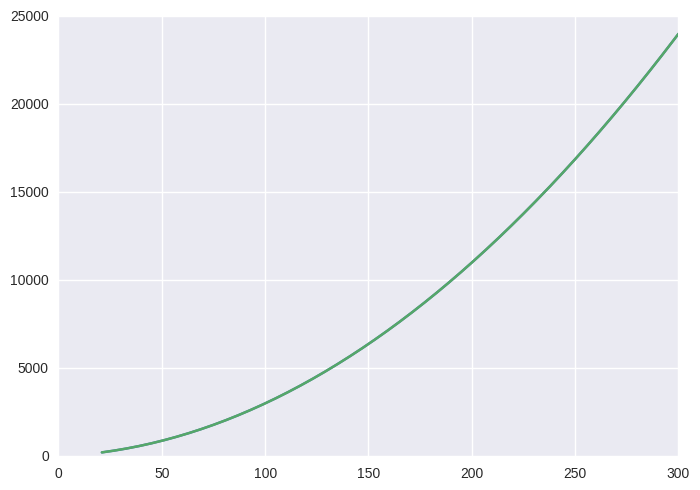

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f651447ccf8>

In [38]:
max_edge_conjecture()

In [39]:
for i in 2:500
    if f(i) != max_edges(10,i)
        @show((i,f(i),max_edges(10,i)))
    end
end

(i,f(i),max_edges(10,i)) = (2,17,12)
(i,f(i),max_edges(10,i)) = (4,30,34)
(i,f(i),max_edges(10,i)) = (5,37,45)
(i,f(i),max_edges(10,i)) = (6,45,56)
(i,f(i),max_edges(10,i)) = (7,53,67)
(i,f(i),max_edges(10,i)) = (8,62,78)
(i,f(i),max_edges(10,i)) = (9,71,89)
(i,f(i),max_edges(10,i)) = (10,81,100)
(i,f(i),max_edges(10,i)) = (11,91,111)
(i,f(i),max_edges(10,i)) = (12,102,122)
(i,f(i),max_edges(10,i)) = (13,113,133)
(i,f(i),max_edges(10,i)) = (14,125,144)
(i,f(i),max_edges(10,i)) = (15,137,155)
(i,f(i),max_edges(10,i)) = (16,150,166)
(i,f(i),max_edges(10,i)) = (17,163,177)
(i,f(i),max_edges(10,i)) = (18,177,188)
(i,f(i),max_edges(10,i)) = (19,191,199)
(i,f(i),max_edges(10,i)) = (20,206,210)
